In [1]:
from dask.distributed import Client

client = Client(n_workers=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 13.93 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:52410,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 13.93 GiB
Comm: tcp://127.0.0.1:52429,Total threads: 2
Dashboard: http://127.0.0.1:52433/status,Memory: 3.48 GiB
Nanny: tcp://127.0.0.1:52413,


In [2]:
import os
import dask
import dask.dataframe as dd

In [3]:
ddf = dd.read_csv(os.path.join("..", "..", "lab_01", "examples", "data", "*.csv"))

In [4]:
ddf

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
npartitions=5,,,,,
,string,string,string,int64,float64
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


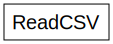

In [5]:
ddf.visualize()

In [6]:
ddf.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
0,Polska,Kowalski,2003-10-25,10333,877.2
1,Polska,Kowalski,2004-03-25,10477,558.0
2,Polska,Sowiński,2004-06-04,10555,2944.4
3,Polska,Dudek,2004-04-16,10501,149.0
4,Niemcy,Leverling,2004-01-15,10410,802.0


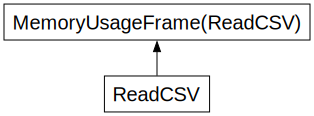

In [7]:
ddf.memory_usage(deep=True).visualize()

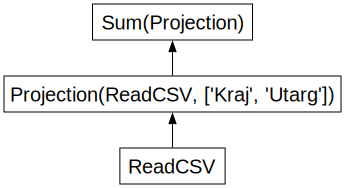

In [8]:
utarg_sum = ddf.groupby(['Kraj']).Utarg.sum()
utarg_sum.visualize()

In [9]:
%%time
utarg_sum.compute()

CPU times: total: 297 ms
Wall time: 3.78 s


Kraj
Niemcy    8.949965e+09
Polska    3.333309e+09
Name: Utarg, dtype: float64

In [10]:
polska = ddf[ddf['Kraj'] == 'Polska']

In [11]:
%%time
polska['Utarg'].sum().compute()

CPU times: total: 297 ms
Wall time: 2.17 s


np.float64(3333309100.0)

In [12]:
polska = polska.persist()

In [13]:
%%time
polska['Utarg'].sum().compute()

CPU times: total: 15.6 ms
Wall time: 101 ms


np.float64(3333309100.0)

In [14]:
import numpy as np
import dask.array as da

In [15]:
%%time
arr = np.random.normal(5, 0.2, size=(20_000, 20_000))
arr_mean = arr.mean(axis=0)
arr_mean

CPU times: total: 8.67 s
Wall time: 13.2 s


array([5.00093497, 4.99828487, 5.00064924, ..., 5.00067776, 4.99979733,
       5.000231  ])

In [16]:
darr = da.random.normal(5, 0.2, size=(20_000, 20_000), chunks=(2000, 2000))
darr

dask.array<normal, shape=(20000, 20000), dtype=float64, chunksize=(2000, 2000), chunktype=numpy.ndarray>

In [17]:
darr_mean = darr.mean(axis=0)
darr_mean

dask.array<mean_agg-aggregate, shape=(20000,), dtype=float64, chunksize=(2000,), chunktype=numpy.ndarray>

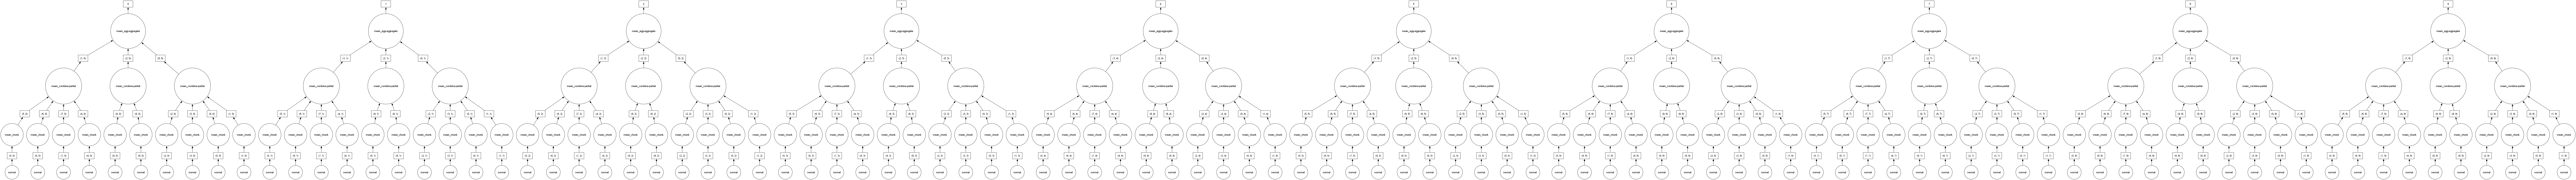

In [18]:
darr_mean.visualize()

In [19]:
%%time
darr_mean.compute()

CPU times: total: 922 ms
Wall time: 3.75 s


array([5.00018781, 5.00027097, 5.00155632, ..., 4.99919012, 4.99970689,
       5.00113688])

In [20]:
darr = da.random.normal(5, 0.2, size=(20_000, 20_000))
darr

dask.array<normal, shape=(20000, 20000), dtype=float64, chunksize=(4096, 4096), chunktype=numpy.ndarray>

In [21]:
%%time
darr.mean(axis=0).compute()

CPU times: total: 500 ms
Wall time: 3.88 s


array([4.99809136, 5.00380303, 5.00045846, ..., 4.99900017, 5.00027517,
       4.99889853])